<a href="https://colab.research.google.com/github/Seongjin1225/AI_SCHOOL_9/blob/main/ML%26DL/12%EC%9B%94%207%EC%9D%BC/12%EC%9B%94_7%EC%9D%BC_%EB%B3%B5%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multinomial Classification
- MNIST 데이터 사용(비정형)


In [ ]:
# 이미지의 경우 결측치,이상치 제거 필요 없다
# why?? 픽셀 정보를 뽑아낸 것이기 때문에
# 결측치나 이상치가 있는 경우는 그림이 생성이 안되기 때문!

# 이제부턴 Tensorflow로 구현을 해볼거에요!
# 필요 라이브러리 호출
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
# Raw Data Load
df = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/ML/MNIST/train.csv')
df.shape

# 확인해보니... 784개의 pixel정보가 있어요! label이 target(종속변수예요!)
# 독립변수(feature)는 당연히 784개예요!

# 결측치나 이상치는 없어요! (잘 정제되서 제공된 데이터이기때문이예요!)
# 하지만 현업데이터를 처리할때는 반드시 체크해야 해요!

# 정규화 하기 전에 일단 이 이미지가 어떤 이미지인지 눈으로 한번 확인하고
# 넘어가요!
# img_data = df.drop('label',axis=1,inplace=False).values
# img_data

# # 10장의 그림을 확인!
# # 2행 5열로 출력할 예정
fig = plt.figure()
fig_arr = []  # subplot 저장할 배열

for n in range(10):
    fig_arr.append(fig.add_subplot(2,5,n+1))
    fig_arr[n].imshow(img_data[n].reshape(28,28),  #imshow() - 그림 그리라는 의미
                                                   # interpolation - 그림 고정하기 위한 옵션?
                      cmap='gray',
                      interpolation='nearest')
plt.tight_layout()
plt.show()

# feature engineering 할 게 없어요!
x_data = df.drop('label',axis=1,inplace=False).values
t_data = df['label'].values

# 결측치, 이상치 제거를 안하더라도,
# 정규화는 반드시 진행해줘야 한다!!
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# train, test 데이터 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 stratify=t_data,
                 test_size=0.3,
                 random_state=1)

In [ ]:
# Tensorflow 구현!
keras_model = Sequential()

keras_model.add(Flatten(input_shape=(784,)))
keras_model.add(Dense(units=10,
                      activation='softmax'))

keras_model.compile(optimizer=Adam(learning_rate=1e-4),
                    loss='sparse_categorical_crossentropy',
                    metrics=['acc'])

keras_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 학습을 해봅시다!
# batch_size = n --> n개씩 나눠서 진행하라는 의미(데이터의 크기가 큰 경우 주로 해당)
history = keras_model.fit(x_data_train_norm,
                t_data_train,
                epochs=100,
                verbose=1,
                validation_split=0.2,
                batch_size=100)

Epoch 1/100
236/236 [==============================] - 1s 3ms/step - loss: 0.2270 - acc: 0.9374 - val_loss: 0.2767 - val_acc: 0.9243
Epoch 2/100
236/236 [==============================] - 1s 3ms/step - loss: 0.2268 - acc: 0.9367 - val_loss: 0.2766 - val_acc: 0.9247
Epoch 3/100
236/236 [==============================] - 1s 3ms/step - loss: 0.2266 - acc: 0.9367 - val_loss: 0.2765 - val_acc: 0.9248
Epoch 4/100
236/236 [==============================] - 1s 4ms/step - loss: 0.2264 - acc: 0.9373 - val_loss: 0.2768 - val_acc: 0.9243
Epoch 5/100
236/236 [==============================] - 1s 5ms/step - loss: 0.2262 - acc: 0.9374 - val_loss: 0.2766 - val_acc: 0.9247
Epoch 6/100
236/236 [==============================] - 1s 4ms/step - loss: 0.2261 - acc: 0.9373 - val_loss: 0.2766 - val_acc: 0.9243
Epoch 7/100
236/236 [==============================] - 1s 4ms/step - loss: 0.2259 - acc: 0.9373 - val_loss: 0.2766 - val_acc: 0.9247
Epoch 8/100
236/236 [==============================] - 1s 4ms/step - 

In [ ]:
# 학습이 잘 되었으니 평가를 진행
keras_model.evaluate(x_data_test_norm, t_data_test)
# [0.29088765382766724, 0.9188095331192017]

# 결과 report(accuracy, recall, precision, f1)값을 구해보아요!
# classification_report()를 이용하는데.. 주의해야 할 점은 one-hot 으로 표현하지
# 않아요. 1차원으로 표현해요(label값을 이용한 1차원 값으로 사용)
# 확률값을 label값으로 변환해야 해요!

import tensorflow as tf
predict_value = tf.argmax(keras_model.predict(x_data_test_norm),axis=1).numpy()
print(classification_report(t_data_test,predict_value))

394/394 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1240
           1       0.96      0.97      0.96      1405
           2       0.92      0.90      0.91      1253
           3       0.90      0.89      0.89      1305
           4       0.93      0.94      0.93      1222
           5       0.89      0.86      0.88      1139
           6       0.94      0.96      0.95      1241
           7       0.93      0.92      0.93      1320
           8       0.89      0.89      0.89      1219
           9       0.88      0.90      0.89      1256

    accuracy                           0.92     12600
   macro avg       0.92      0.92      0.92     12600
weighted avg       0.92      0.92      0.92     12600



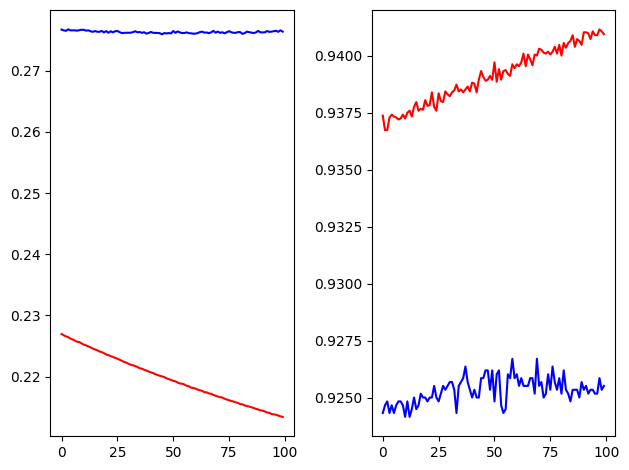

In [ ]:
# 그래프를 그려보아요!
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(loss,color='r')
ax1.plot(val_loss, color='b')

ax2.plot(acc,color='r')
ax2.plot(val_acc,color='b')

plt.tight_layout()
plt.show()

In [ ]:
# 제출파일 작성해서 Kaggle에 제출해보기
# 이부분은 확인 필요!
test = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/ML/MNIST/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/ML/MNIST/sample_submission.csv')

test_data_norm = scaler.transform(test.values)
predict= keras_model.predict(test_data_norm)
predict

submission['Label'] = np.argmax(predict,axis=1)
submission

submission.to_csv('./subm.csv',index=False)

875/875 [==============================] - 1s 1ms/step


In [ ]:
# 이번에는 Fashion-MNIST 데이터를 가지고
# 학습과 평가를 진행해 보아요!

# 필요 모듈 호출
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [ ]:
# Raw Data Loading
df = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/ML/F_MNIST/fashion-mnist_train.csv')
df

# 당연히 이미지 이므로 결측치, 이상치 처리 필요 없음!
# 실무에서는 전부 확인해야 한다!

# 10개 이미지를 출력해보자
# img_data = df.drop('label',axis=1,inplace=False).values

# fig = plt.figure()
# fig_arr = []

# for n in range(10):
#     fig_arr.append(fig.add_subplot(2,5,n+1))
#     fig_arr[n].imshow(img_data[n].reshape(28,28),
#                       cmap='gray',
#                       interpolation='nearest')
# plt.tight_layout()
# plt.show()

x_data = df.drop('label',axis=1,inplace=False).values
t_data = df['label'].values

# 정규화 진행
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# 데이터 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 stratify=t_data,
                 test_size=0.3,
                 random_state=1)

In [ ]:
# Tensorflow 구현
keras_model = Sequential()

keras_model.add(Flatten(input_shape=(784,)))
keras_model.add(Dense(units=10,
                      activation='softmax'))

keras_model.compile(optimizer=Adam(learning_rate=1e-4),
                    loss='sparse_categorical_crossentropy',
                    metrics=['acc'])

keras_model.fit(x_data_train_norm,
                t_data_train,
                epochs=100,
                verbose=1,
                validation_split=0.2,
                batch_size=100)

keras_model.evaluate(x_data_test_norm,t_data_test)
# [0.43715688586235046, 0.8523333072662354]

In [ ]:
# 결과 값을 구해보자
# classification_report 사용하는데, one-hot이 아닌 1차원으로 표현!
import tensorflow as tf
predict_label = tf.argmax(keras_model.predict(x_data_test_norm),axis=1).numpy()
print(classification_report(t_data_test,predict_label))

563/563 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1800
           1       0.97      0.95      0.96      1800
           2       0.73      0.75      0.74      1800
           3       0.86      0.86      0.86      1800
           4       0.74      0.78      0.76      1800
           5       0.95      0.92      0.94      1800
           6       0.66      0.58      0.62      1800
           7       0.91      0.94      0.93      1800
           8       0.94      0.94      0.94      1800
           9       0.94      0.95      0.95      1800

    accuracy                           0.85     18000
   macro avg       0.85      0.85      0.85     18000
weighted avg       0.85      0.85      0.85     18000



In [ ]:
# 비지도학습(데이터에 종속변수,target,label이 없는 경우)
# 가장 대표적인 알고리즘은 K-means 알고리즘
# K-means 알고리즘은 EM 알고리즘으로 작동
# EM에서 E는 Expectation의 의미로 가장 가까운 centroid에 데이터를 군집으로 할당
# EM에서 M은 Maximization의 의미로 cluster 경계에 대한 중심점(centroids)을 결정

# cluster의 경계가 변하지 않을때까지 계속해서 반복
# 초기 centroids의 선택에 따라 cluster가 다르게 생성될 수 도 있다!
# 어떤 경우는 좋고, 어떤 경우는 나쁘다!
# 여러번 실행해 가장 좋은 결과를 사용

# 이제 간단하게 코드로 표현
# 중심점이 4개인 데이터 100개를 무작위로 생성해서 정상적으로 작동되는지'
# 확인해 보면 좋을거 같아요!

# n_samples = 전체 데이터 포인트의 수
# centers = 클러스터(cluster)의 수
# n_features = 각 데이터 포인트의 feature 개수(데이터의 차원수)
# random_state = 랜덤값을 생성하기 위한 seed 값(난수의 재현율 보장하기 위해)
# points = 생성된 데이터의 feature
# labels = 각 데이터 포인트의 소속 클러스터 레이블
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

points,labels = make_blobs(n_samples=100,
                           centers=4,
                           n_features=2,
                           random_state=100)
points.shape
labels.shape
np.unique(labels,return_counts=True)

(array([0, 1, 2, 3]), array([25, 25, 25, 25]))